In [1]:
# OS
import sys

# NUMPY
import numpy as np

# STATS
import scipy.stats as stats
from scipy.stats import norm, skew

# MATPLOTLIB
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('fivethirtyeight') 

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

# REDUCTION DE LA DIMENSION 
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, LocallyLinearEmbedding, Isomap, TSNE

# PANDAS
import pandas as pd 
pd.set_option("display.max_rows", None, "display.max_columns", None) 
import pandas_profiling as pp

# SEABORN
import seaborn as sns

# SCHIKIT-LEARN: PRE-PROCESSING
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # encodage des variables catégorielles nominales
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder # encodage des variables catégorielles ordinales
from sklearn.preprocessing import StandardScaler # normalisation des variables numériques
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer # imputation
from sklearn.impute import KNNImputer 
from sklearn.svm import LinearSVC, SVC # machines à vecteurs de support


# SCHIKIT-LEARN: MODELES
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet

# SCHIKIT-LEARN: VALIDATION CROISEE + OPTIMISATION
from sklearn.model_selection import train_test_split # 
from sklearn.model_selection import cross_val_score # validation croisée pour comparaison entre modèles
from sklearn.model_selection import validation_curve # courbe de validation: visulaisr les scores lors du choix d'un hyperparamétre
from sklearn.model_selection import GridSearchCV # tester plusieurs hyper_paramètres
from sklearn.model_selection import learning_curve # courbe d'apprentissage: visualisation les scores du train et du validation sets en fonction des quanitiés des données
 
## EVALUATION
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
## EVALUATION
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

## EVALUATION: COURBE ROC
from sklearn.metrics import auc # aire sous la courbe 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import precision_recall_curve #
from sklearn.metrics import f1_score, recall_score
from sklearn.metrics import average_precision_score

# SCHIKIT-LEARN: PIPELINE
from sklearn.pipeline import make_pipeline

## EVALUATION: COURBE ROC
from sklearn.metrics import auc # aire sous la courbe 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 

# Chargement des données

In [2]:
import os
Bad_payers = pd.read_excel('credit.xls')

In [3]:
Bad_payers.head(3)

,ID,X1: LIMIT_BAL,X2: SEX,X3: EDUCATION,X4: MARRIAGE,X5: AGE,X6: PAY_1,X7: PAY_2,X8: PAY_3,X9: PAY_4,X10: PAY_5,X11: PAY_6,X12: BILL_AMT1,X13: BILL_AMT2,X14: BILL_AMT3,X15: BILL_AMT4,X16: BILL_AMT5,X17: BILL_AMT6,X18: PAY_AMT1,X19: PAY_AMT2,X20: PAY_AMT3,X21: PAY_AMT4,X22: PAY_AMT5,X23: PAY_AMT6,Y: default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [4]:
for i in Bad_payers.columns:
    print(i)

ID
X1: LIMIT_BAL
X2: SEX
X3: EDUCATION
X4: MARRIAGE
X5: AGE
X6: PAY_1
X7: PAY_2
X8: PAY_3
X9: PAY_4
X10: PAY_5
X11: PAY_6
X12: BILL_AMT1
X13: BILL_AMT2
X14: BILL_AMT3
X15: BILL_AMT4
X16: BILL_AMT5
X17: BILL_AMT6
X18: PAY_AMT1
X19: PAY_AMT2
X20: PAY_AMT3
X21: PAY_AMT4
X22: PAY_AMT5
X23: PAY_AMT6
Y: default payment next month


La valeur target est "Y: default payment next month"

# 1 - Analyse exploratoire

In [5]:
duplicate_pay = Bad_payers[Bad_payers.duplicated()]
print("Nombre de valeurs dupliquées dans le dataset : " + str(len(duplicate_pay)))
duplicate_pay.head(3)
# liste des élément qui sont dupliqué dans le dataset
print("Pourcentage des valeurs dupliquées dans le dataset : " + str(len(duplicate_pay)/len(Bad_payers) * 100) + "%")
# la proportion de variables dupliqué est infime, nous prendrons la décision de les supprimer pour prévenir d'éventuels erreurs humaines

Nombre de valeurs dupliquées dans le dataset : 0
Pourcentage des valeurs dupliquées dans le dataset : 0.0%


In [6]:
Bad_payers.isna().sum().sum()

0

In [7]:
Bad_payers.isnull().sum().sum()

0

In [8]:
# La colonne ID ne sert à rien car pandas la génère déjà
del Bad_payers["ID"]

In [9]:
# Le dataset ne contient aucune donné manquante (mais certaines valeurs ne sont pas décrites dans la documentation)
# La valeur mariage 3 n'est pas décrite par exemple

# 2 - Reformatage du Dataset
Pour plus de lisibilité nous allons reformater ce dataset aux convetions occidentales

In [10]:
labels = ['X1: LIMIT_BAL','X5: AGE','X17: BILL_AMT6','X16: BILL_AMT5','X15: BILL_AMT4','X14: BILL_AMT3','X13: BILL_AMT2','X12: BILL_AMT1','X23: PAY_AMT6','X22: PAY_AMT5','X21: PAY_AMT4','X20: PAY_AMT3','X19: PAY_AMT2','X18: PAY_AMT1']
for i in labels :
    Bad_payers[i] = Bad_payers[i].astype(float, errors = 'raise')
Bad_payers.dtypes
# On passe le varibles continues en float pour la suite

X1: LIMIT_BAL                    float64
X2: SEX                            int64
X3: EDUCATION                      int64
X4: MARRIAGE                       int64
X5: AGE                          float64
X6: PAY_1                          int64
X7: PAY_2                          int64
X8: PAY_3                          int64
X9: PAY_4                          int64
X10: PAY_5                         int64
X11: PAY_6                         int64
X12: BILL_AMT1                   float64
X13: BILL_AMT2                   float64
X14: BILL_AMT3                   float64
X15: BILL_AMT4                   float64
X16: BILL_AMT5                   float64
X17: BILL_AMT6                   float64
X18: PAY_AMT1                    float64
X19: PAY_AMT2                    float64
X20: PAY_AMT3                    float64
X21: PAY_AMT4                    float64
X22: PAY_AMT5                    float64
X23: PAY_AMT6                    float64
Y: default payment next month      int64
dtype: object

In [11]:
Bad_payers = Bad_payers[['X1: LIMIT_BAL','X2: SEX','X3: EDUCATION','X4: MARRIAGE','X5: AGE','X11: PAY_6','X10: PAY_5','X9: PAY_4','X8: PAY_3','X7: PAY_2','X6: PAY_1','X17: BILL_AMT6','X16: BILL_AMT5','X15: BILL_AMT4','X14: BILL_AMT3','X13: BILL_AMT2','X12: BILL_AMT1','X23: PAY_AMT6','X22: PAY_AMT5','X21: PAY_AMT4','X20: PAY_AMT3','X19: PAY_AMT2','X18: PAY_AMT1','Y: default payment next month']]

In [12]:
months = ["April", "May", "June", "July", "August", "September"]
labels = ['X11: PAY_6', 'X10: PAY_5', 'X9: PAY_4', 'X8: PAY_3', 'X7: PAY_2', 'X6: PAY_1']
for i,j in zip(months, labels) :
    Bad_payers.rename(columns = {j:"Delay " + i}, inplace = True)

In [13]:
labels = ['X17: BILL_AMT6','X16: BILL_AMT5','X15: BILL_AMT4','X14: BILL_AMT3','X13: BILL_AMT2','X12: BILL_AMT1']
for i,j in zip(months, labels) :
    Bad_payers.rename(columns = {j:"Bill " + i}, inplace = True)

In [14]:
labels = ['X23: PAY_AMT6','X22: PAY_AMT5','X21: PAY_AMT4','X20: PAY_AMT3','X19: PAY_AMT2','X18: PAY_AMT1']
for i,j in zip(months, labels) :
    Bad_payers.rename(columns = {j:"Payment " + i}, inplace = True) 
# On décide de réorganiser dans l'ordre chronologique et d'ajouter des labels plus parlants

In [15]:
Bad_payers.head(3)

,X1: LIMIT_BAL,X2: SEX,X3: EDUCATION,X4: MARRIAGE,X5: AGE,Delay April,Delay May,Delay June,Delay July,Delay August,Delay September,Bill April,Bill May,Bill June,Bill July,Bill August,Bill September,Payment April,Payment May,Payment June,Payment July,Payment August,Payment September,Y: default payment next month
0,20000.0,2,2,1,24.0,-2,-2,-1,-1,2,2,0.0,0.0,0.0,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,1
1,120000.0,2,2,2,26.0,2,0,0,0,2,-1,3261.0,3455.0,3272.0,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,1
2,90000.0,2,2,2,34.0,0,0,0,0,0,0,15549.0,14948.0,14331.0,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0


# 3 - Etude de la variable cible

In [16]:
cible = "Y: default payment next month"
Bad_payers[cible].head(3)

0    1
1    1
2    0
Name: Y: default payment next month, dtype: int64

In [17]:
# La variable cible est de type catégorielle (booléenne)

In [18]:
Bad_payers["Y: default payment next month"].value_counts()

0    23364
1     6636
Name: Y: default payment next month, dtype: int64

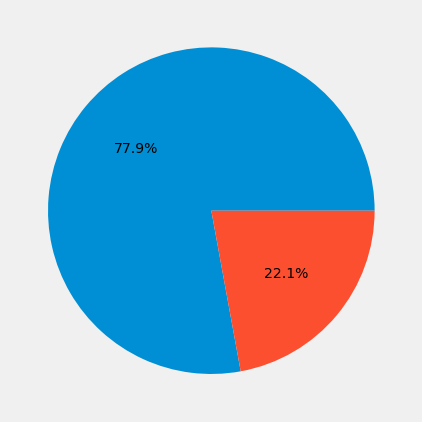

In [19]:
plt.figure(figsize=(10, 7))
plt.pie(Bad_payers["Y: default payment next month"].value_counts(), autopct='%1.1f%%')
plt.show()

In [20]:
# La variable cible est déséquilibrée

# 4 - Analyse univariée
## Etude des variables catégorielles

In [21]:
Bad_payers.dtypes.value_counts()

float64    14
int64      10
dtype: int64

2    18112
1    11888
Name: X2: SEX, dtype: int64


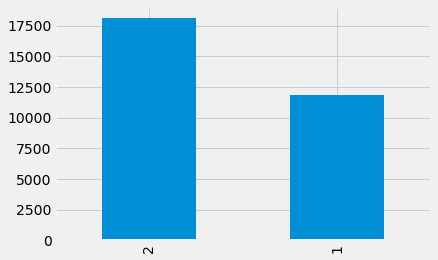

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: X3: EDUCATION, dtype: int64


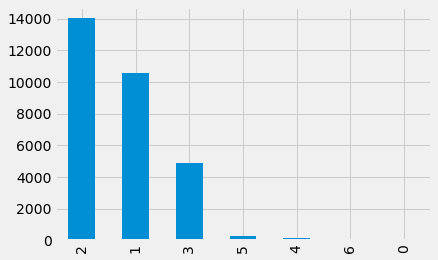

2    15964
1    13659
3      323
0       54
Name: X4: MARRIAGE, dtype: int64


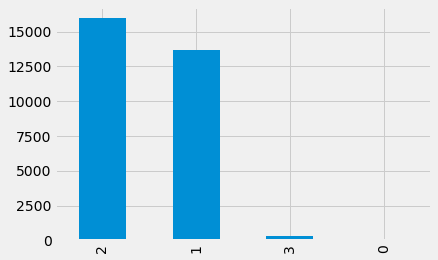

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: Delay April, dtype: int64


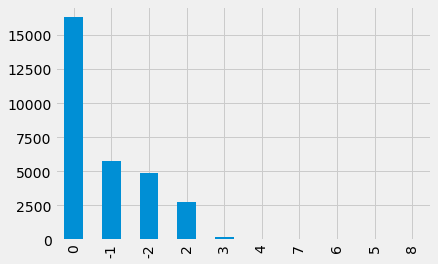

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: Delay May, dtype: int64


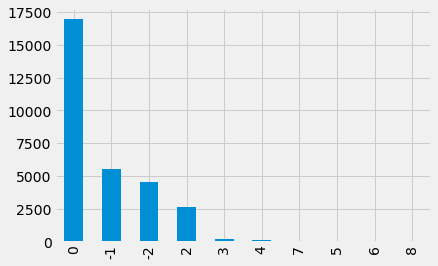

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: Delay June, dtype: int64


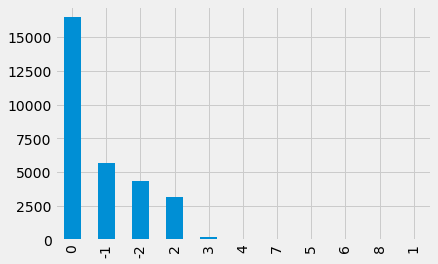

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: Delay July, dtype: int64


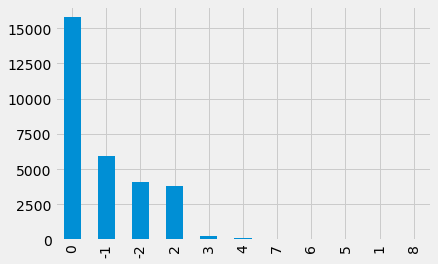

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: Delay August, dtype: int64


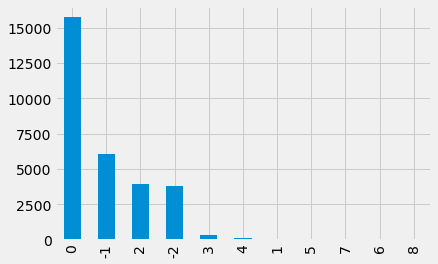

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: Delay September, dtype: int64


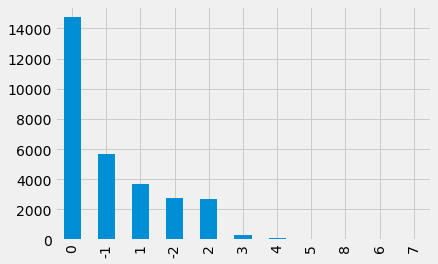

0    23364
1     6636
Name: Y: default payment next month, dtype: int64


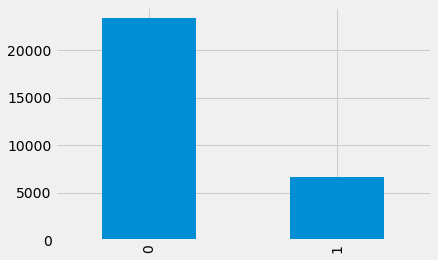

In [22]:
for feature in Bad_payers.select_dtypes('Int64'):
    plt.figure()
    print(Bad_payers[feature].value_counts())
    Bad_payers[feature].value_counts().plot.bar()
    plt.show()

In [23]:
# Certains éléments ne sont pas définit dans la description comme les études 0, 4, 5, 6 et le mariage 3...
# Certaines variables catégorielles devrons êtres réoganisé du coté de leurs labels

## Distribution des variables numériques

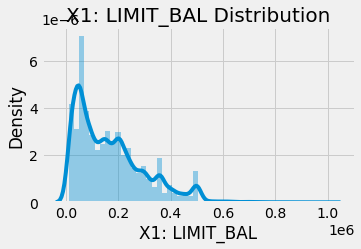

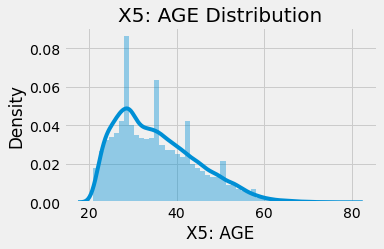

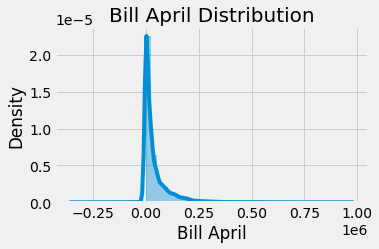

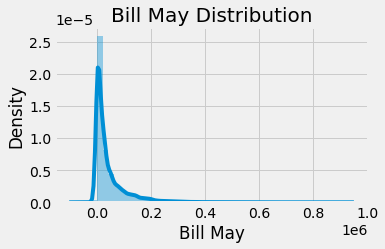

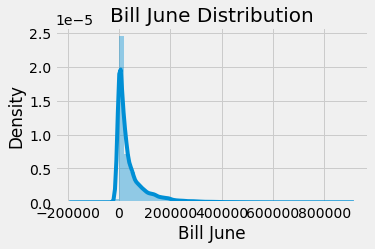

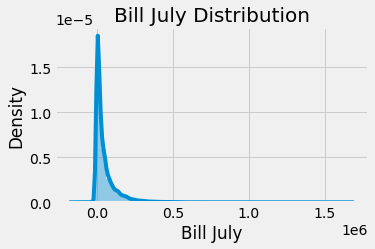

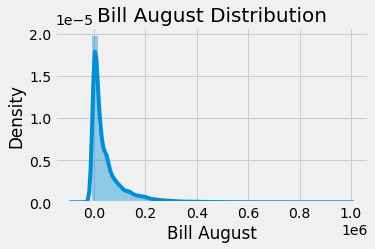

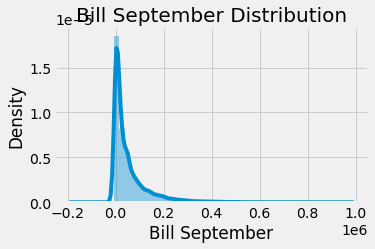

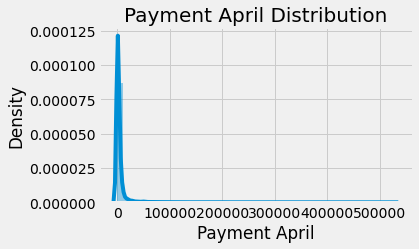

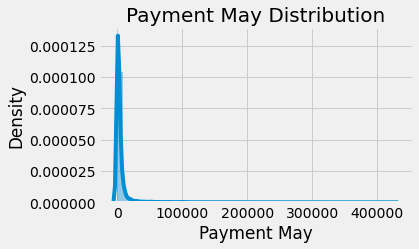

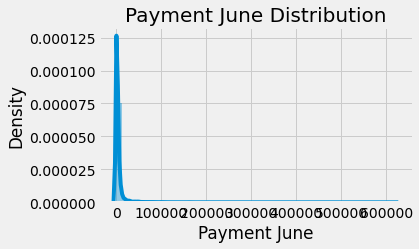

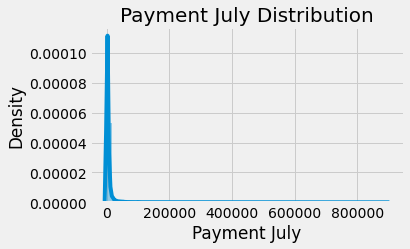

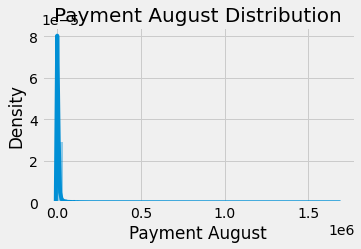

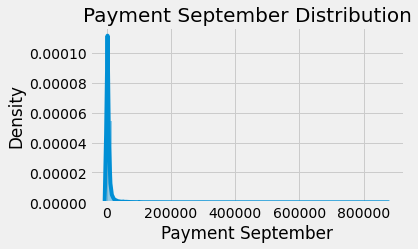

In [24]:
for feature in Bad_payers.select_dtypes('float64'):
    plt.figure(figsize=(5,3))
    sns.distplot(Bad_payers[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

In [25]:
# Les payment et dut au dessous de 250k sont très sous représentés, idem pour des près de plus de 600k

# 5 - Corrélation

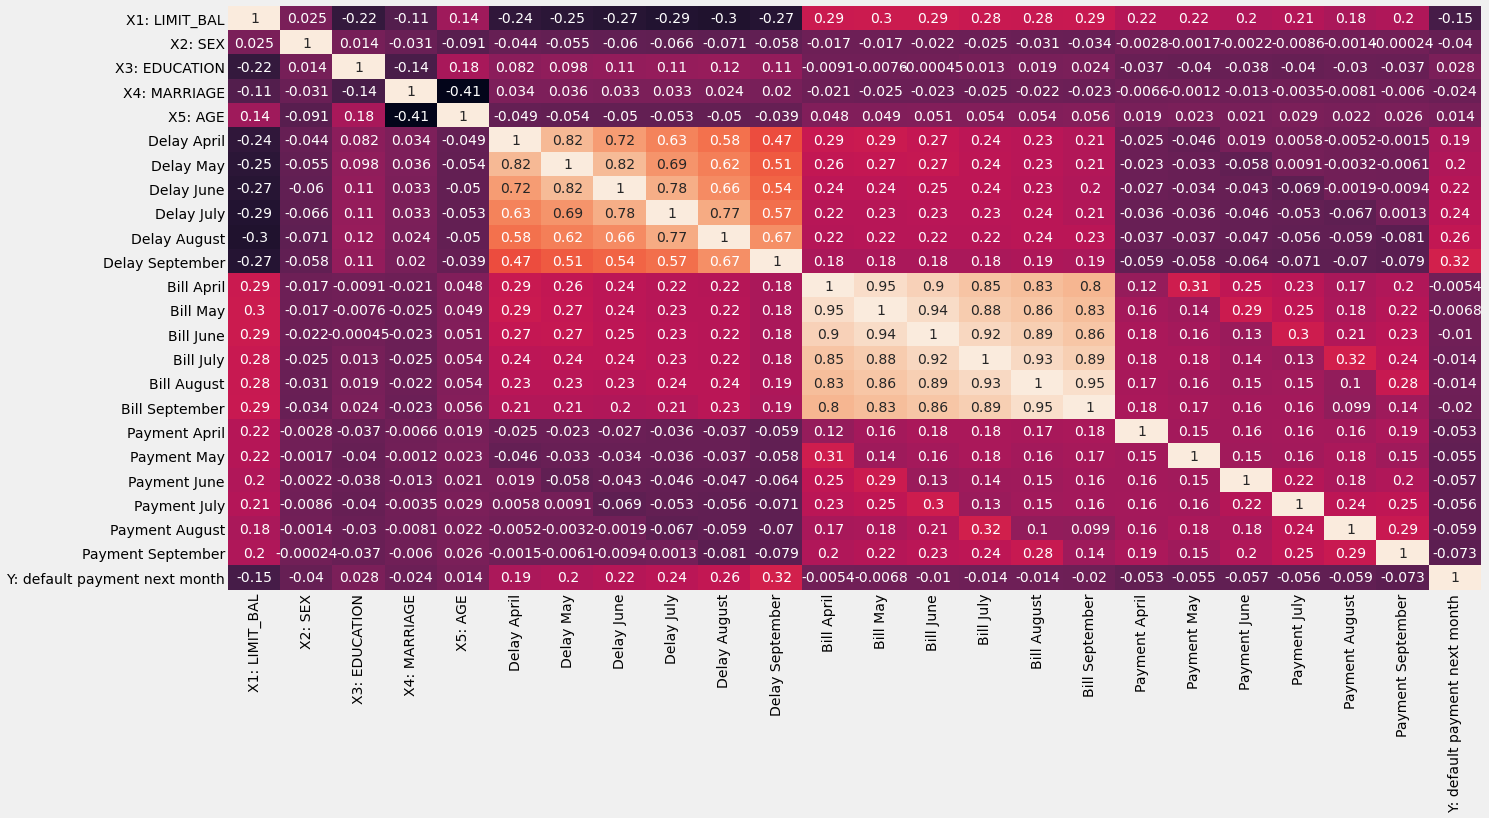

In [26]:
plt.figure(figsize=(20, 10))
sns.heatmap(Bad_payers.corr(), annot=True, cbar=False) #
plt.show()

# 6 - Analyse bivariée

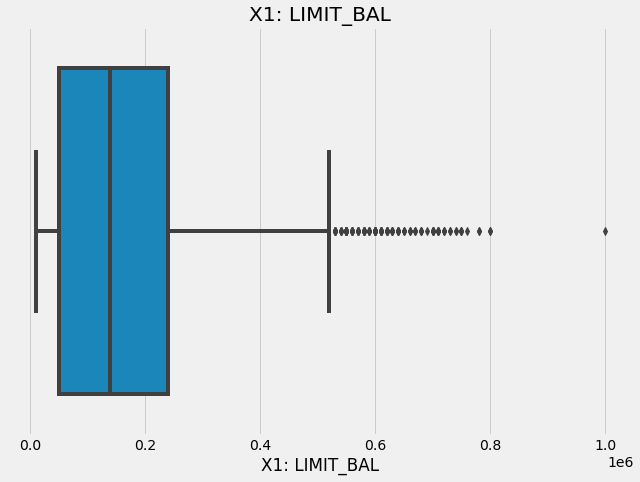

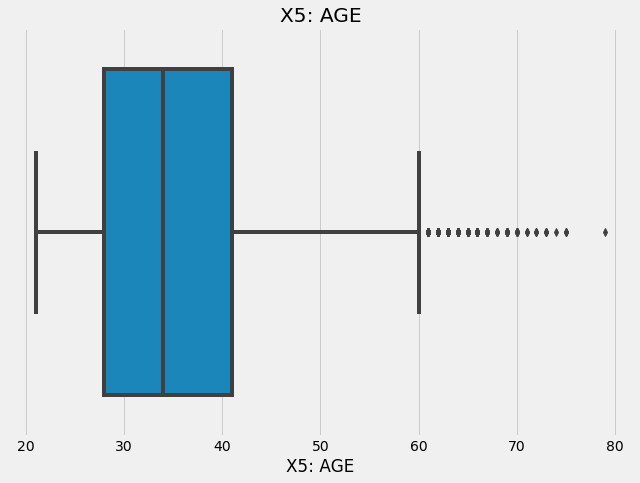

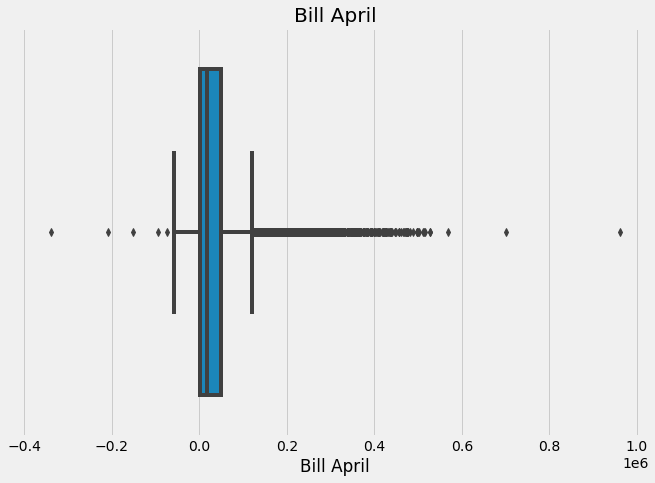

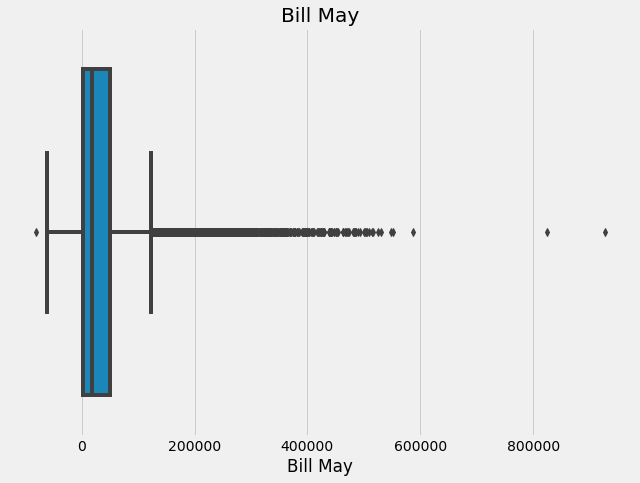

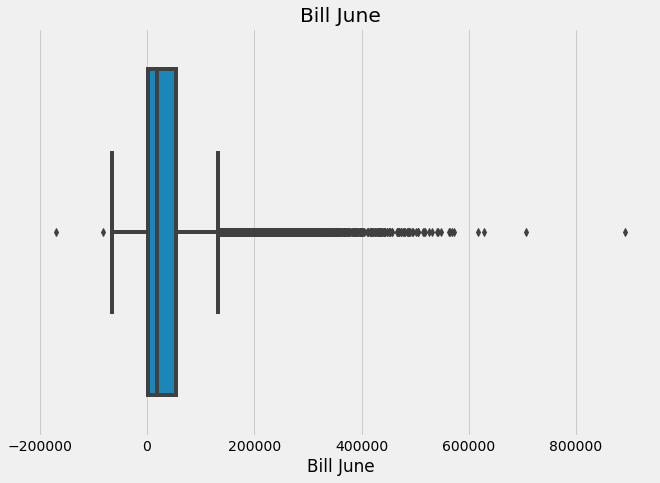

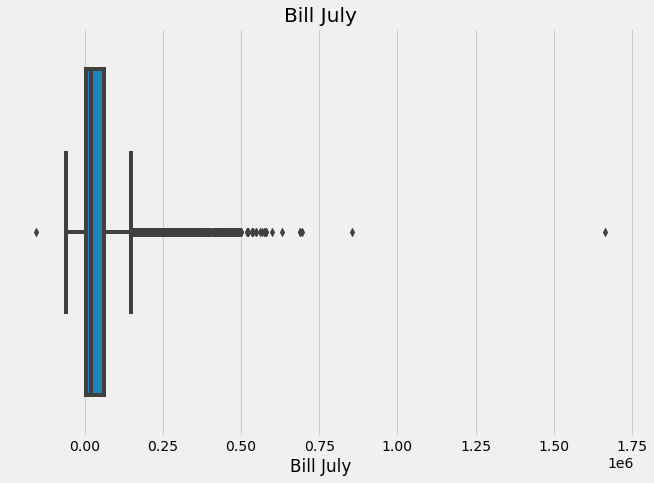

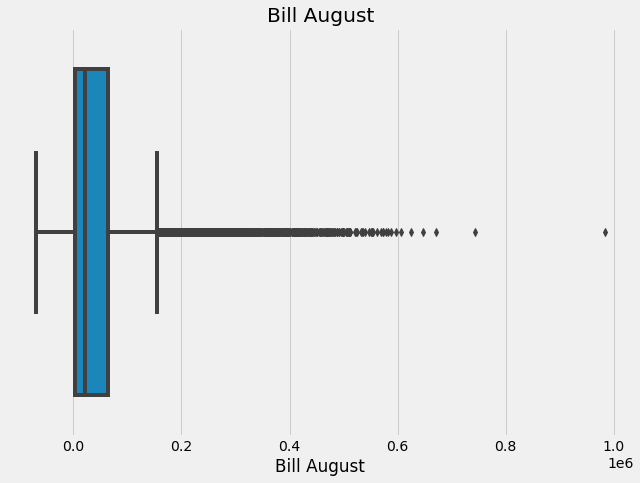

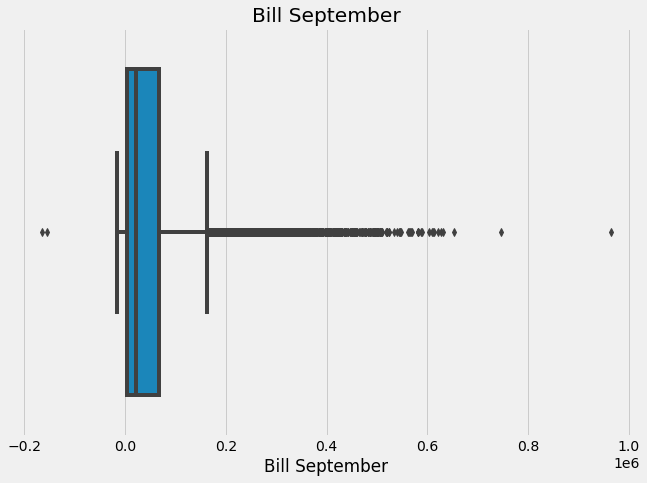

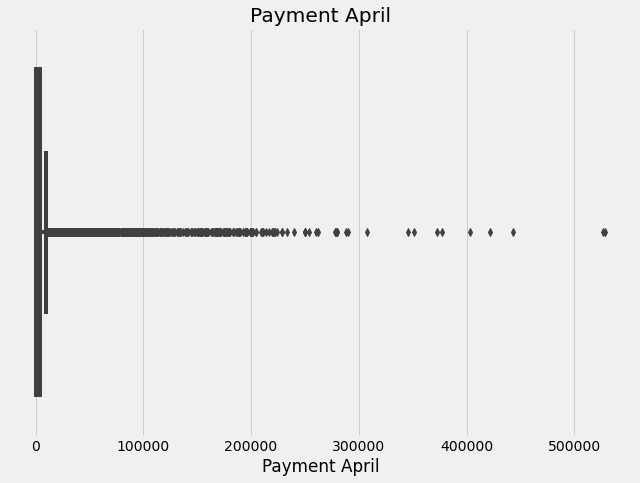

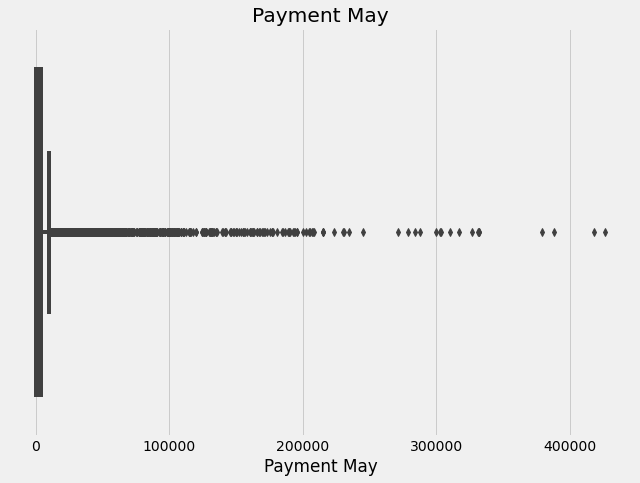

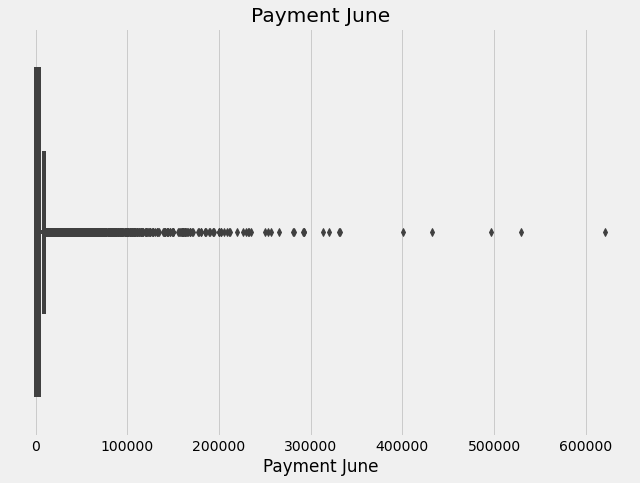

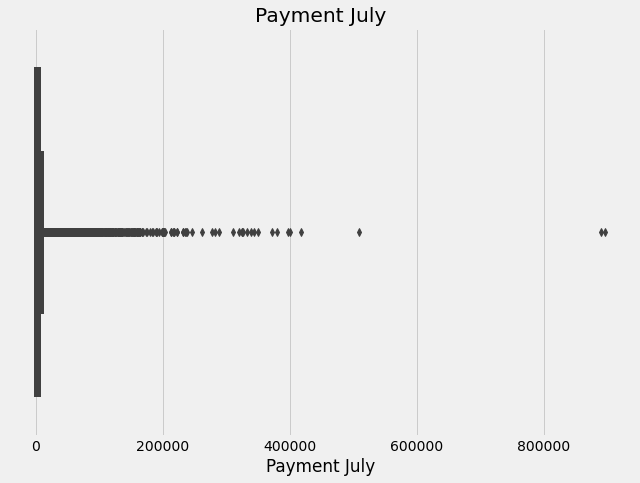

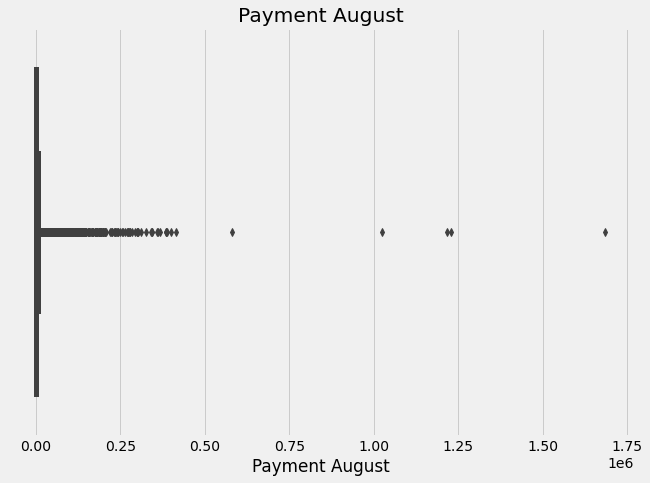

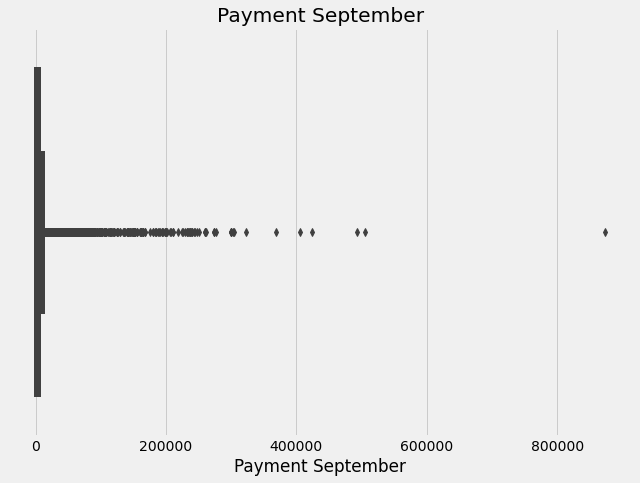

In [27]:
cat_features = Bad_payers.select_dtypes(include=['int64']).columns
cont_features = Bad_payers.select_dtypes(include=['float64']).columns

for feature in cont_features:
    plt.figure(figsize=(10,7))
    sns.boxplot(x=feature, data=Bad_payers, hue=cible)
    plt.title(feature)
    plt.show()

# 5 - Pré-Traitement

1 : Le dataset ne contient aucune donné manquante (mais certaines valeurs ne sont pas décrites dans la documentation)
Certains éléments ne sont pas définit dans la description comme les études 0, 5, 6 et le mariage 3...

2 : La proportion de variables dupliqué est infime, nous prendrons la décision de les supprimer pour prévenir d'éventuels erreurs humaines

3 : Les payment et dut au dessous de 250k sont très sous représentés, idem pour des près de plus de 600k

4 : La variable cible est très déséquilibrée

5 : Certaines variables ne sont que très peux corrélées et donc non pertinentes

In [28]:
# X4: Marital status (1 = married; 2 = single; 3 = others)
# Il est possible que les personnes ne soit pas des personnes phisique ou que ce soit les veuves et veuf qui soient dans others
# Ces classe étant peux interresantes et petites, nous préférons filtrer les 0 et les 3
before = len(Bad_payers)
Bad_payers = Bad_payers[Bad_payers["X4: MARRIAGE"] <= 2]
Bad_payers = Bad_payers[Bad_payers["X4: MARRIAGE"] != 0]
after = len(Bad_payers)
print ("Pourcentage de filtrage : ", 100 - after/before * 100)
Bad_payers["X4: MARRIAGE"].value_counts()

Pourcentage de filtrage :  1.2566666666666606


2    15964
1    13659
Name: X4: MARRIAGE, dtype: int64

In [29]:
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

dic_occur = {}
for i in Bad_payers["X3: EDUCATION"]:
    dic_occur[i] = 0
for i in Bad_payers["X3: EDUCATION"]:
    dic_occur[i] += 1
print(dic_occur)

in_value = [1, 2, 3, 4]
total_in = 0

for i in dic_occur:
    if i in in_value:
        total_in += dic_occur[i]
print("Pourcentage des valeurs dont les labels sont décrits : " + str(total_in/len(Bad_payers)*100))

{2: 13862, 1: 10531, 3: 4770, 5: 277, 4: 120, 6: 49, 0: 14}
Pourcentage des valeurs dont les labels sont décrits : 98.85224318941364


In [30]:
# Plusieurs intermprétation sont possible :
# 1 - 0, 5 et 6 appartiennent en réalité à la classe 4 (others)
# 2 - Il existe des indices dont nous n'avons la définition (ce pourait être la descritpion de personnes morales par exemple une entreprise)
# 3 - Ces valeurs sont le fruit d'une erreur de saisie et ne doivent pas être considérées

In [31]:
# Il convient de déterminer si les classe 0, 5 et 6 se démarquent des autres classes définient par rapport à la target
six_v = Bad_payers[Bad_payers["X3: EDUCATION"] == 6]
cinq_v = Bad_payers[Bad_payers["X3: EDUCATION"] == 5]
other_v = Bad_payers[Bad_payers["X3: EDUCATION"] == 4]
trois_v = Bad_payers[Bad_payers["X3: EDUCATION"] == 3]
deux_v = Bad_payers[Bad_payers["X3: EDUCATION"] == 2]
un_v = Bad_payers[Bad_payers["X3: EDUCATION"] == 1]
zero_v = Bad_payers[Bad_payers["X3: EDUCATION"] == 0]
print("Pourcentage de bon payeurs en fonction du niveau d'étude : \n")
print("Bac : ", trois_v[cible].value_counts()[0]/len(trois_v)*100)
print("Bac+1 à +5 : ", deux_v[cible].value_counts()[0]/len(deux_v)*100)
print("Bac+6 et Bac+7 : ", un_v[cible].value_counts()[0]/len(un_v)*100)
print()
print(six_v[cible].value_counts()[0]/len(six_v)*100)
print(cinq_v[cible].value_counts()[0]/len(cinq_v)*100)
print(other_v[cible].value_counts()[0]/len(other_v)*100)
print(zero_v[cible].value_counts()[0]/len(zero_v)*100)

Pourcentage de bon payeurs en fonction du niveau d'étude : 

Bac :  74.71698113207546
Bac+1 à +5 :  76.30212090607415
Bac+6 et Bac+7 :  80.79004842844934

83.6734693877551
93.50180505415162
94.16666666666667
100.0


In [32]:
# Grâce à ces indicateurs, on peux observer que les classes 0, 5 et 6 sont plus assimilables à la classe 4 dans les chiffres
# On peux faire la supposition que ces autres classes représentent les entreprises et les personne avec un nombre d'années après le bac superieurs à 7
new = []
for i in Bad_payers["X3: EDUCATION"]:
    if i not in in_value: 
        new.append(4)
    else:
        new.append(i)
        
Bad_payers["X3: EDUCATION"] = new       
Bad_payers["X3: EDUCATION"].value_counts()

2    13862
1    10531
3     4770
4      460
Name: X3: EDUCATION, dtype: int64

In [33]:
# On peux aussi noter que plus le niveau d'étude est important plus les individus sont de bons payeurs
print("Pourcentage de bon payeurs en fonction du niveau d'étude : \n")
print("Bac : ", trois_v[cible].value_counts()[0]/len(trois_v)*100)
print("Bac+1 à +5 : ", deux_v[cible].value_counts()[0]/len(deux_v)*100)
print("Bac+6 et Bac+7 : ", un_v[cible].value_counts()[0]/len(un_v)*100)
other_v = Bad_payers[Bad_payers["X3: EDUCATION"] == 4]
print("Bac ++ : ", other_v[cible].value_counts()[0]/len(other_v)*100)

Pourcentage de bon payeurs en fonction du niveau d'étude : 

Bac :  74.71698113207546
Bac+1 à +5 :  76.30212090607415
Bac+6 et Bac+7 :  80.79004842844934
Bac ++ :  92.82608695652173


In [34]:
# 2 : La proportion de variables dupliqué est infime, nous prendrons la décision de les supprimer pour prévenir d'éventuels erreurs humaines
before = len(Bad_payers)
Bad_payers = Bad_payers.drop_duplicates() 
after = len(Bad_payers)
print ("Pourcentage de filtrage : ", 100 - after/before * 100)
# De plus les valeurs dupliquées sont peu interressantes, car les sommes à rembourser et remboursées sont souvent vides

Pourcentage de filtrage :  0.11815143638389713


In [35]:
# 3 : Les payment et dut au dessous de 250k sont très sous représentés, idem pour des près de plus de 600k
before = len(Bad_payers)
Bad_payers = Bad_payers[Bad_payers["X1: LIMIT_BAL"] < 600000]
for i in Bad_payers:
    if not i == "X1: LIMIT_BAL":
        Bad_payers = Bad_payers[Bad_payers[i] < 250000]
after = len(Bad_payers)
print ("Pourcentage de filtrage : ", 100 - after/before * 100)

Pourcentage de filtrage :  3.7954576179532182


In [36]:
total_pay = 0
total_delay = 0
for month in months:
    total_pay += Bad_payers["Payment " + month]
    total_delay += Bad_payers["Delay "+month]

Bad_payers["Total payment"] = total_pay
Bad_payers["Reste à payer"] = Bad_payers["X1: LIMIT_BAL"] - Bad_payers["Total payment"]
Bad_payers["Total delay"] = total_delay
    
cat_features = Bad_payers.select_dtypes(include=['int64']).columns
cont_features = Bad_payers.select_dtypes(include=['float64']).columns

# X_train, X_test, y_train, y_test

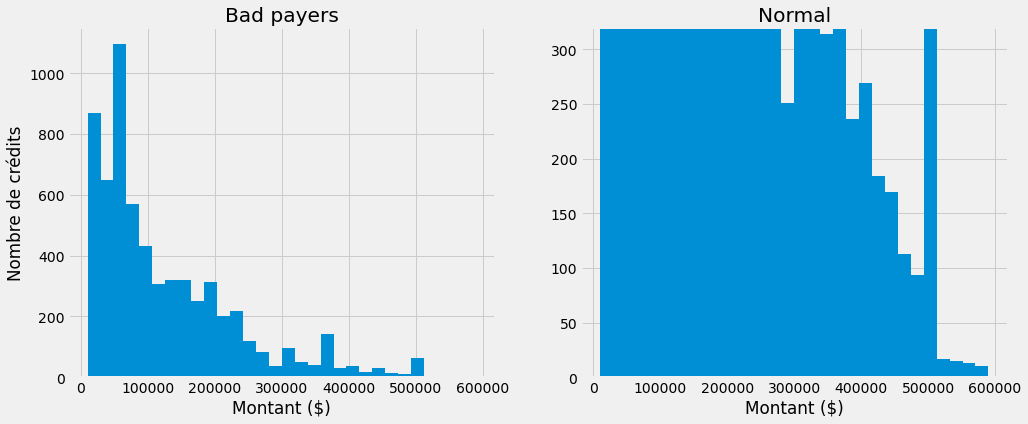

In [37]:
Bad_payers_fraud = Bad_payers[Bad_payers[cible] == 1]
Bad_payers_ok = Bad_payers[Bad_payers[cible] == 0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
bins = 30

ax1.hist(Bad_payers_fraud['X1: LIMIT_BAL'], bins=bins)
ax2.hist(Bad_payers_ok['X1: LIMIT_BAL'], bins=bins)

ax1.set_title('Bad payers')
ax2.set_title('Normal')

ax1.set_xlabel('Montant (\$)')
ax2.set_xlabel('Montant (\$)')
ax1.set_ylabel('Nombre de crédits')

ax2.set_ylim(0, 320)
plt.show()

In [38]:
trainset, testset = train_test_split(Bad_payers, test_size=.2, random_state=0)

In [39]:
trainset.shape, testset.shape

((22772, 27), (5693, 27))

In [40]:
trainset[cible].value_counts()

0    17704
1     5068
Name: Y: default payment next month, dtype: int64

In [41]:
testset[cible].value_counts()

0    4446
1    1247
Name: Y: default payment next month, dtype: int64

In [42]:
def preprocessing(df):
    X = Bad_payers.drop(cible, axis=1)
    y = Bad_payers[cible]
    # features = X.columns
    # scaler = StandardScaler()
    # X.loc[:, features] = scaler.fit_transform(X[features])
    return X, y

In [43]:
X_train, y_train = preprocessing(trainset)
X_test , y_test= preprocessing(testset)

In [44]:
# Fonctions d'évaluation

In [45]:
def anomaly_scores(X_original, X_reduced):
    loss = np.sum((np.array(X_original)-np.array(X_reduced))**2, axis=1)
    loss = pd.Series(data=loss,index=X_original.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

In [46]:
# Plot results
def plotResults(labels, anomaly_scores, returnPreds = False):
    preds = pd.concat([labels, anomaly_scores], axis=1)
    preds.columns = ['Labels', 'AnomalyScores']
    precision, recall, thresholds = precision_recall_curve(preds['Labels'],preds['AnomalyScores'])
    average_precision = average_precision_score(preds['Labels'],preds['AnomalyScores'])
    
    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
    
    # plt.plot(thresholds, precision[:-1], label='precision')
    # plt.plot(thresholds, recall[:-1], label='recall')
    # plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    
    plt.title('Courbe Precision-Recall: Moyenne de précision = \
    {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(preds['Labels'], \
                                     preds['AnomalyScores'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Courbe ROC: \
    Aire sous la courbe ROC = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()
    
    if returnPreds==True:
        return preds

In [47]:
def scatterPlot(X, y):
    temp = pd.DataFrame(data=X.loc[:,0:1], index=X.index)
    temp = pd.concat((temp,y), axis=1, join="inner")
    temp.columns = ["PC1", "PC2", "Label"]
    sns.lmplot(x="PC1", y="PC2", hue="Label", \
               data=temp, fit_reg=False)
    ax = plt.gca()
    # ax.set_title("Spération des observation avec  "+algoName)

In [48]:
## PCA 

In [49]:
n_components = 15
random_state = 0

pca = PCA(n_components=n_components, random_state=random_state)

X_train_pca = pca.fit_transform(X_train)
X_train_pca = pd.DataFrame(data=X_train_pca, index=X_train.index)

In [50]:
X_train_pca.shape

(28465, 15)

In [51]:
X_train_pca_inverse = pca.inverse_transform(X_train_pca)
X_train_pca_inverse = pd.DataFrame(data=X_train_pca_inverse, index=X_train.index)

In [52]:
X_train_pca_inverse.shape

(28465, 26)

In [53]:
anomalyScores = anomaly_scores(X_train, X_train_pca_inverse)

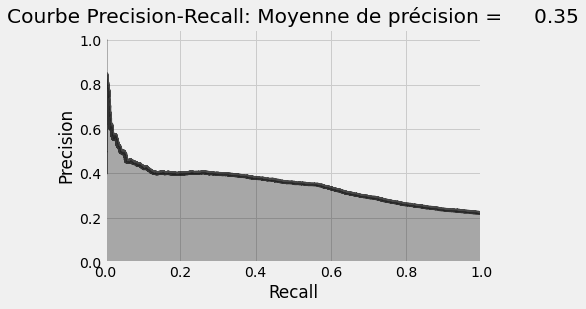

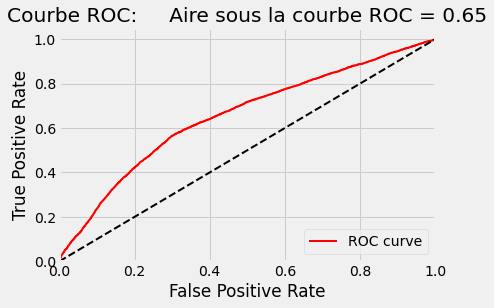

In [54]:
preds = plotResults(y_train, anomalyScores)

In [55]:
# Evalaution 

In [56]:
X_test_pca = pca.transform(X_test)
X_test_pca = pd.DataFrame(data=X_test_pca, index=X_test.index)

X_test_pca_inverse = pca.inverse_transform(X_test_pca)
X_test_pca_inverse = pd.DataFrame(data=X_test_pca_inverse, \
                                  index=X_test.index)


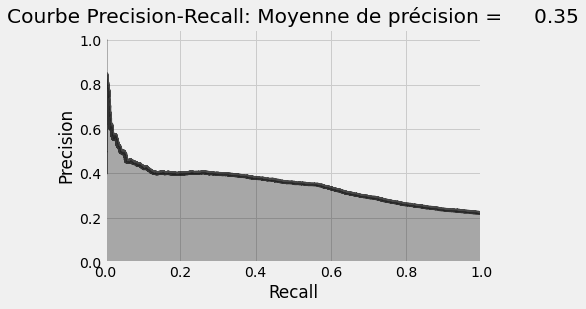

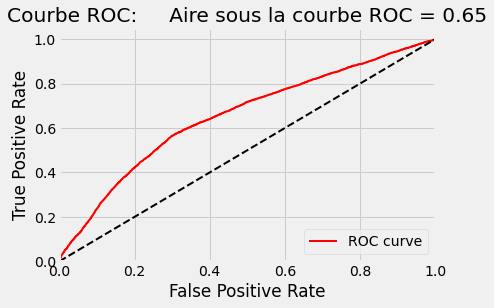

In [57]:
anomalyScoresPCA = anomaly_scores(X_test, X_test_pca_inverse)
preds = plotResults(y_test, anomalyScoresPCA, True)

In [58]:
X_pca_tsne = pca.fit_transform(X_train)
X_pca_tsne = pd.DataFrame(X_pca_tsne, index=X_train.index)

X_pca_tsne[cible] = y_train
ok_sample = X_pca_tsne[X_pca_tsne[cible] == 0].sample(2000)
df_fraud = X_pca_tsne[X_pca_tsne[cible] == 1].sample(500)
df_tsne = ok_sample.append(df_fraud).sample(frac=1).reset_index(drop=True)

X_tsne = df_tsne.values
y_tsne = df_tsne[cible].values

tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_tsne = tsne.fit_transform(X_tsne)

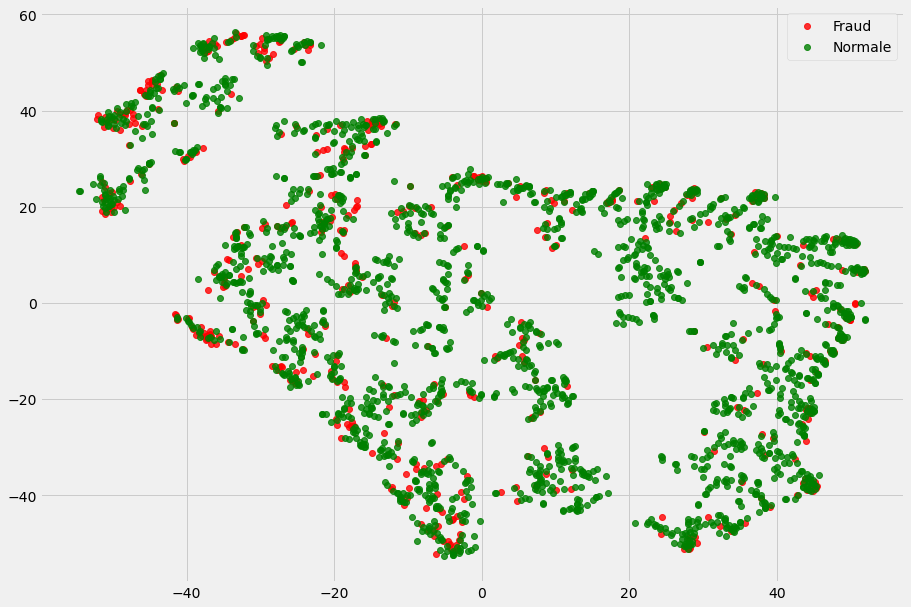

In [59]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0, 0, 1, 1])

ax.scatter(X_tsne[np.where(y_tsne == 1), 0], X_tsne[np.where(y_tsne == 1), 1],
           marker='o', color='r', linewidth=1, alpha=0.8, label='Fraud')
ax.scatter(X_tsne[np.where(y_tsne == 0), 0], X_tsne[np.where(y_tsne == 0), 1],
           marker='o', color='g', linewidth=1, alpha=0.8, label='Normale')

ax.legend(loc='best')